In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

73728/70166 [===============================] - 0s 5us/step


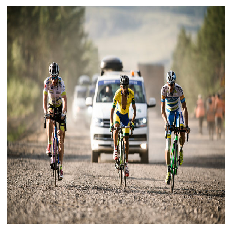

In [20]:
file = tf.keras.utils.get_file(
    "09xp-siberianraceSUB1-articleLarge.jpg",
    "https://static01.nyt.com/images/2017/08/09/sports/09xp-siberianraceSUB1/09xp-siberianraceSUB1-articleLarge.jpg")

# https://static01.nyt.com/images/2017/08/09/sports/09xp-siberianraceSUB1/09xp-siberianraceSUB1-articleLarge.jpg
# https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg
img = tf.keras.preprocessing.image.load_img(file, target_size=[224, 224])
plt.imshow(img)
plt.axis('off')
x = tf.keras.preprocessing.image.img_to_array(img)
x = tf.keras.applications.mobilenet.preprocess_input(
    x[tf.newaxis,...])

In [3]:
labels_path = tf.keras.utils.get_file(
    'ImageNetLabels.txt',
    'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

In [4]:
# pretrained_model = tf.keras.applications.MobileNet()
# result_before_save = pretrained_model(x)

# decoded = imagenet_labels[np.argsort(result_before_save)[0,::-1][:5]+1]

# print("Result before saving:\n", decoded)

In [5]:
# tf.saved_model.save(pretrained_model, "./mobilenet/1/")

In [6]:
# !saved_model_cli show --dir ./mobilenet/1 --tag_set serve --signature_def serving_default

In [7]:
# loaded = tf.saved_model.load("./mobilenet/1/")
# print(list(loaded.signatures.keys()))  # ["serving_default"]

In [8]:
# infer = loaded.signatures["serving_default"]
# print(infer.structured_outputs)

In [9]:
# labeling = infer(tf.constant(x))[pretrained_model.output_names[0]]

# decoded = imagenet_labels[np.argsort(labeling)[0,::-1][:5]+1]

# print("Result after saving and loading:\n", decoded)

In [ ]:
# # Download the TensorFlow Serving Docker image and repo
# docker pull tensorflow/serving

# docker run -p 8501:8501 \
#   --mount type=bind,source=$(pwd)/mobilenet,target=/models/mobilenet \
#   -e MODEL_NAME=mobilenet -t tensorflow/serving

In [21]:
# !pip install -q requests
import json
import numpy
import requests
data = json.dumps({"signature_name": "serving_default",
                   "instances": x.tolist()})
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/mobilenet:predict',
                              data=data, headers=headers)
predictions = numpy.array(json.loads(json_response.text)["predictions"])

In [22]:
decoded = imagenet_labels[np.argsort(predictions)[0,::-1][:5]+1]

In [23]:
decoded

array(['bicycle-built-for-two', 'mountain bike', 'motor scooter',
       'military uniform', 'bearskin'], dtype='<U30')